In [16]:
from math import sqrt
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [58]:
df = pd.read_csv("./digit-recognizer/train.csv")
X = df.drop('label', axis=1)
Y = df.label
trainx, testx, trainy, testy=  train_test_split(X,Y, test_size= 0.3)
train = np.column_stack((trainx, trainy))


In [3]:
def Euclidean_distance(row1, row2):
 distance = 0
 for i in range(len(row1)-1):
    distance += (row1[i] -row2[i])**2
 return sqrt(distance)

Get Neighbors of 4


In [48]:
def Get_Neighbors(train, test_row, num):
   distance = list() # []
   data = []
   for i in train:
      dist = Euclidean_distance(test_row, i)
      distance.append(dist)
      data.append(i)
   distance = np.array(distance)
   data = np.array(data)
   #Finding the index in ascending order
   index_dist = distance.argsort()
   #Arranging data according to index
   data = data[index_dist]
   #slicing k value from number of data
   neighbors = data[:num]
   return neighbors  

In [49]:
def predict_classification(train, test_row, num):
    Neighbors = Get_Neighbors(train, test_row, num)
    Classes = []
    for i in Neighbors:
        Classes.append(i[-1])
    prediction = max(Classes, key= Classes.count)
    return prediction

In [84]:
def accuracy(y_true, y_pred):
    n_correct = 0
    for i in range(len(y_pred)):
        if y_true[i+2001] == y_pred[i]:
            n_correct += 1
    acc = n_correct/len(y_pred)
    return acc

In [85]:
prediction = predict_classification(train[:2000], train[2205], 4)
prediction

4

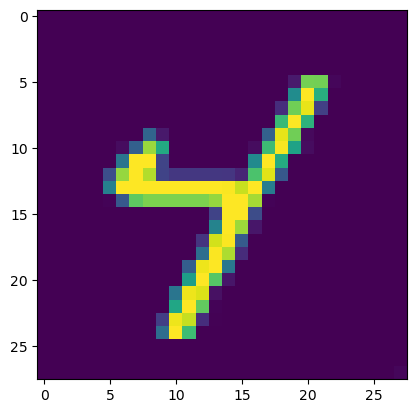

In [86]:
plt.imshow(train[2205,1:].reshape(28,28))

In [87]:
y_pred=[]
y_true=train[:,-1]
for i in range(2001,2100):
    prediction = predict_classification(train[:2000], train[i], 4)
    y_pred.append(prediction)
accuracy(y_true, y_pred)


0.9292929292929293

In [88]:
y_pred[1], y_true[2002]

(6, 6)